In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

path = '/kaggle/input/training_data.csv'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/training_data.csv


In [4]:
letter_to_number = {'A': 0, 'B':1, 'C': 2, 'D':3, 'E':4}
df = pd.read_csv(path)
print("number of nan",df['f3'].isna().sum())

number of nan 184


In [5]:
def load_data_from_csv(path):
    df = pd.read_csv(path)
    df.dropna(inplace=True) 
    #print("number of nan",df['f3'].isna().sum())
    df['f3'] = df['f3'].map(letter_to_number) 
    print(df.head()) 
    X = df[['f1','f2', 'f3']].to_numpy()
    Y = df[['target']].to_numpy()
        
    return X,Y

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

X,Y = load_data_from_csv(path)

for x in np.unique(Y): 
    print("Value: {}, Number of items: {}".format(x, np.count_nonzero(Y==x)))

# sc = StandardScaler()
# X = sc.fit_transform(X)
# ohe = OneHotEncoder()
# Y = ohe.fit_transform(Y).toarray()
# or 
#y_train_binary = keras.utils.to_categorical(y_train, num_classes)

# test = list()
# for i in range(len(Y_test)):
#     test.append(np.argmax(Y_test[i]))

# Y_pred = model.predict(X_test)
# pred = list()
# for i in range(len(Y_pred)):
#     pred.append(np.argmax(Y_pred[i]))

         f1        f2  f3  target
0  2.956120  7.229489   0       1
1  0.925209  5.441243   1       0
2  1.528047  3.147318   1       0
3 -1.229230  4.814813   1       2
4 -2.715823  3.539231   3       2
Value: 0, Number of items: 1590
Value: 1, Number of items: 1646
Value: 2, Number of items: 1601


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape, "Y_test shape:", Y_test.shape)

X_train shape: (3869, 3) Y_train shape: (3869, 1)
X_test shape: (968, 3) Y_test shape: (968, 1)


### Plot the data

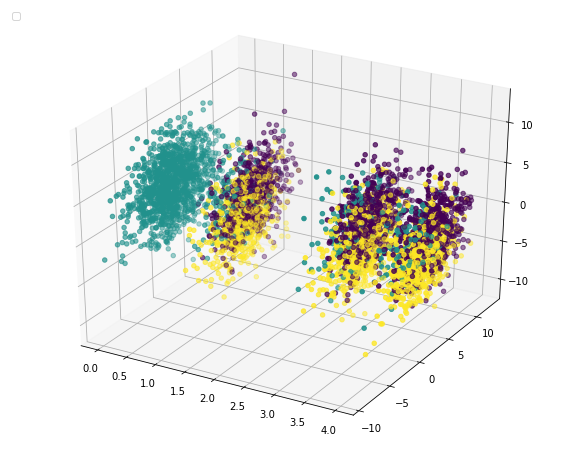

In [8]:
import matplotlib.pyplot as plt 
#fig, ax = plt.subplots(figsize=(7, 7), projection='3d')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,2], X[:,1], X[:,0],c=Y)
ax.legend( loc='upper left')
plt.show()

In [9]:
import matplotlib.pyplot as plt 
#fig = plt.figure(figsize=(10,8))
def get_cut(X,Y, sl):
    X_cut = X[X[:,2] == sl]
    Y_cut = Y[X[:,2] == sl]
    return X_cut, Y_cut 

def plot_cuts(X,Y):
    fig, axs = plt.subplots(1,4, figsize=(20,5)) 

    for i in range(4):
        j = i+1 if i > 1 else i
        X_cut, Y_cut = get_cut(X,Y, j)    
        axs[i].scatter(X_cut[:,1], X_cut[:,0],c=Y_cut)
    plt.show()

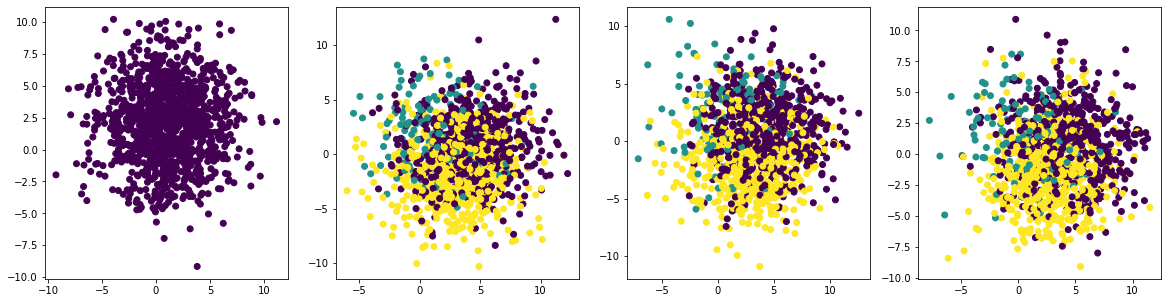

In [10]:
plot_cuts(X,Y)

# Simple Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, Y_train.flatten())

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Train Accuracy:  0.6805376066166968 number of test samples:  3869
Test Accuracy:  0.6683884297520661 number of test samples:  968


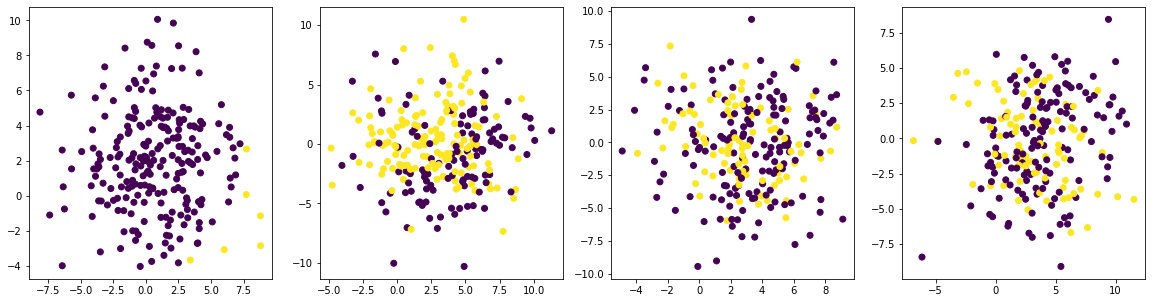

In [12]:
Y_pred = logreg.predict(X_test)
error = Y_pred - Y_test.flatten() 
error = (error != 0).astype(int) 
print("Train Accuracy: ",logreg.score(X_train,Y_train), "number of test samples: ", Y_train.shape[0])
print("Test Accuracy: ",logreg.score(X_test,Y_test), "number of test samples: ", Y_test.shape[0])

plot_cuts(X_test, error)

# Neural network

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
# Neural network
model = Sequential()
model.add(Dense(100, input_dim=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, input_dim=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [30]:
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=100, batch_size=512)

Train on 3869 samples, validate on 968 samples
Epoch 1/100
3869/3869 [==============================] - 1s 141us/step - loss: 1.0903 - accuracy: 0.4689 - val_loss: 0.9164 - val_accuracy: 0.6116
Epoch 2/100
3869/3869 [==============================] - 0s 18us/step - loss: 0.8969 - accuracy: 0.5932 - val_loss: 0.8886 - val_accuracy: 0.6333
Epoch 3/100
3869/3869 [==============================] - 0s 18us/step - loss: 0.8505 - accuracy: 0.6188 - val_loss: 0.8871 - val_accuracy: 0.6457
Epoch 4/100
3869/3869 [==============================] - 0s 16us/step - loss: 0.8134 - accuracy: 0.6296 - val_loss: 0.8806 - val_accuracy: 0.6415
Epoch 5/100
3869/3869 [==============================] - 0s 16us/step - loss: 0.7925 - accuracy: 0.6325 - val_loss: 0.8713 - val_accuracy: 0.6426
Epoch 6/100
3869/3869 [==============================] - 0s 17us/step - loss: 0.7720 - accuracy: 0.6425 - val_loss: 0.8593 - val_accuracy: 0.6550
Epoch 7/100
3869/3869 [==============================] - 0s 17us/step - loss

3869/3869 [==============================] - 0s 18us/step - loss: 0.5940 - accuracy: 0.7253 - val_loss: 0.6268 - val_accuracy: 0.7066
Epoch 57/100
3869/3869 [==============================] - 0s 17us/step - loss: 0.5992 - accuracy: 0.7196 - val_loss: 0.6268 - val_accuracy: 0.7097
Epoch 58/100
3869/3869 [==============================] - 0s 18us/step - loss: 0.5970 - accuracy: 0.7265 - val_loss: 0.6306 - val_accuracy: 0.7076
Epoch 59/100
3869/3869 [==============================] - 0s 19us/step - loss: 0.5979 - accuracy: 0.7180 - val_loss: 0.6300 - val_accuracy: 0.7107
Epoch 60/100
3869/3869 [==============================] - 0s 18us/step - loss: 0.5974 - accuracy: 0.7198 - val_loss: 0.6237 - val_accuracy: 0.7097
Epoch 61/100
3869/3869 [==============================] - 0s 16us/step - loss: 0.5953 - accuracy: 0.7172 - val_loss: 0.6235 - val_accuracy: 0.7107
Epoch 62/100
3869/3869 [==============================] - 0s 17us/step - loss: 0.5976 - accuracy: 0.7216 - val_loss: 0.6234 - val_a

# Visualize learning

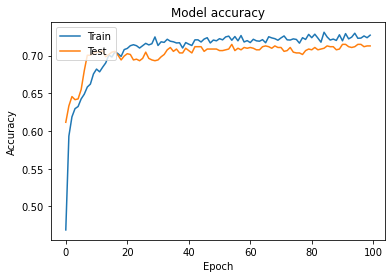

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(968,) (968, 1)
968/968 [==============================] - 0s 29us/step
Train Accuracy:  0.7299043536186218  Number of test samples:  3869
Test Accuracy:  0.7128099203109741  Number of test samples:  968


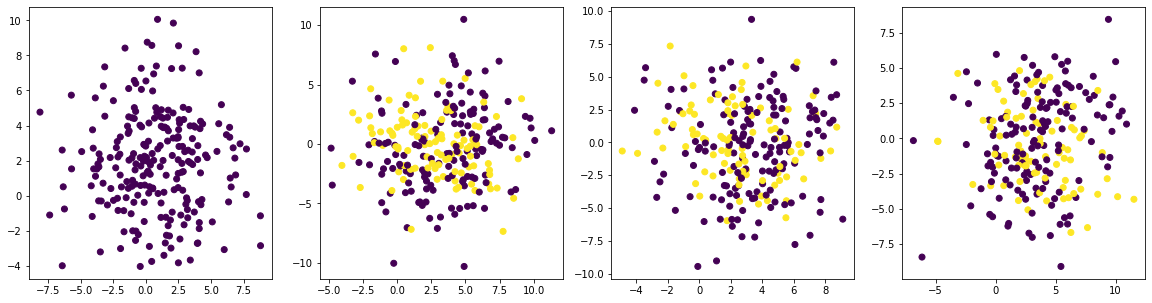

In [46]:
Y_pred = model.predict_classes(X_test)

error = Y_pred - Y_test.flatten()
error = (error != 0).astype(int) 
print(Y_pred.shape, Y_test.shape)
_, acc_train = model.evaluate(X_train,Y_train)
_, acc_test = model.evaluate(X_test,Y_test)
print("Train Accuracy: ", acc_train, " Number of test samples: ", Y_train.shape[0])
print("Test Accuracy: ", acc_test, " Number of test samples: ", Y_test.shape[0])

plot_cuts(X_test, error)

# Trees

In [47]:
from sklearn.ensemble import RandomForestClassifier
Y_train_tree = Y_train.flatten()
clf = RandomForestClassifier(n_estimators = 10, max_depth=5)

clf.fit(X_train, Y_train_tree)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train Accuracy:  0.7381752390798656  Number of test samples:  3869
Test Accuracy:  0.7086776859504132  Number of test samples:  968


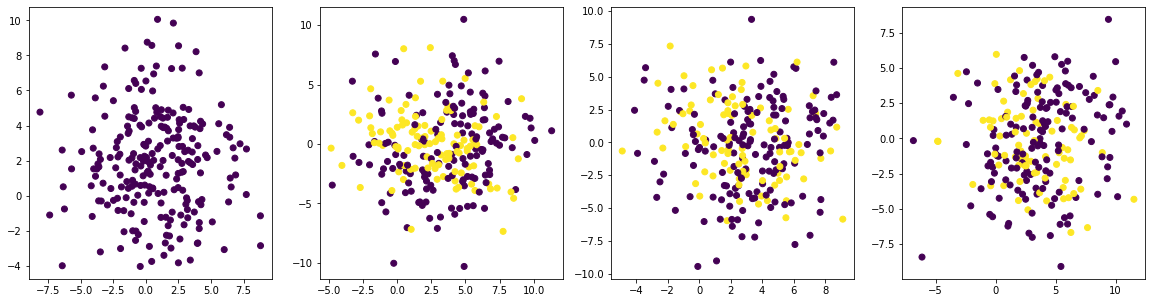

In [48]:
Y_pred = clf.predict(X_test)
error = Y_pred - Y_test.flatten() 
error = (error != 0).astype(int) 
print("Train Accuracy: ",clf.score(X_train,Y_train), " Number of test samples: ", Y_train.shape[0])
print("Test Accuracy: ",clf.score(X_test,Y_test), " Number of test samples: ", Y_test.shape[0])

plot_cuts(X_test, error)

In [52]:
import pickle

# save the tree model to disk
filename_tree = 'tree_model.pkl'
pickle.dump(clf, open(filename_tree, 'wb'))

In [53]:
# load the model from disk
loaded_model = pickle.load(open(filename_tree, 'rb'))
result = loaded_model.score(X_test, Y_test)
print("Test score:", result)

Test score: 0.7086776859504132


In [50]:
# save the model to disk
filename_nn = 'nn_model.pkl'
pickle.dump(model, open(filename_nn, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename_nn, 'rb'))
result = loaded_model.evaluate(X_test, Y_test)
print("Test score:", result)